In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import root_mean_squared_error

import warnings
warnings.filterwarnings('ignore')


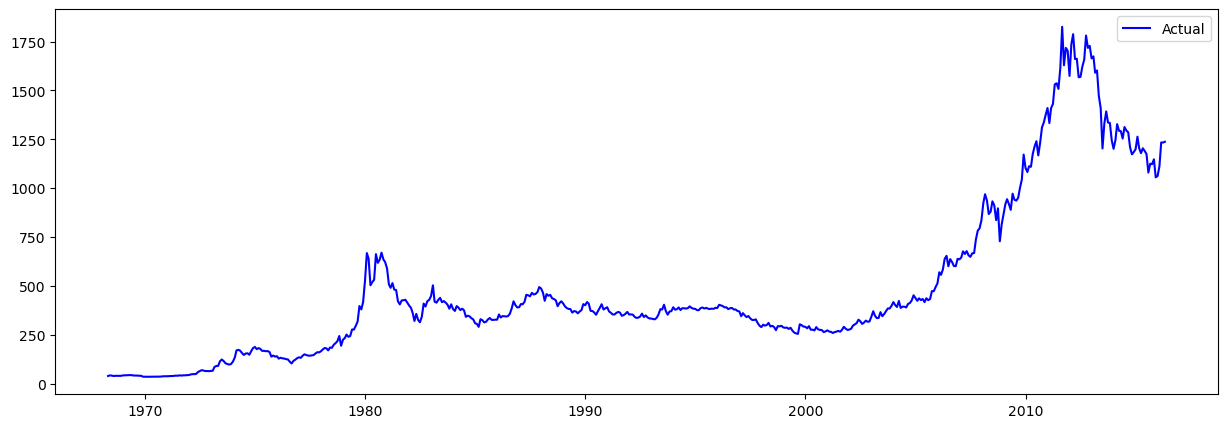

In [4]:
back_df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data\Data Sets\BUNDESBANK-BBK01_WT5511.csv', index_col=0) 
back_df.index = pd.to_datetime(back_df.index, errors='coerce')

plt.figure(figsize=(15,5))
plt.plot(back_df.index, back_df['Value'], color='blue', label='Actual') 
plt.legend()
plt.show()

In [5]:
y = back_df['Value']

y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((565,), (12,))

In [6]:
from pmdarima.arima import auto_arima

In [7]:
def arima_with_plot(model):
    
    y_pred = model.predict(n_periods=len(y_test))

    # Calculate RMSE
    error = root_mean_squared_error(y_test, y_pred)
    print("RMSE: ", error)

    y_pred.index = y_test.index

    plt.figure(figsize=(15, 5))
    plt.plot(y_train, label='Train')
    plt.plot(y_test, label='Test')
    plt.plot(y_pred, label='Prediction')
    plt.legend()
    plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5622.164, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5618.047, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5617.332, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5622.101, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5618.606, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5618.188, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5617.812, Time=0.12 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 2.689 seconds
RMSE:  91.10508106510662


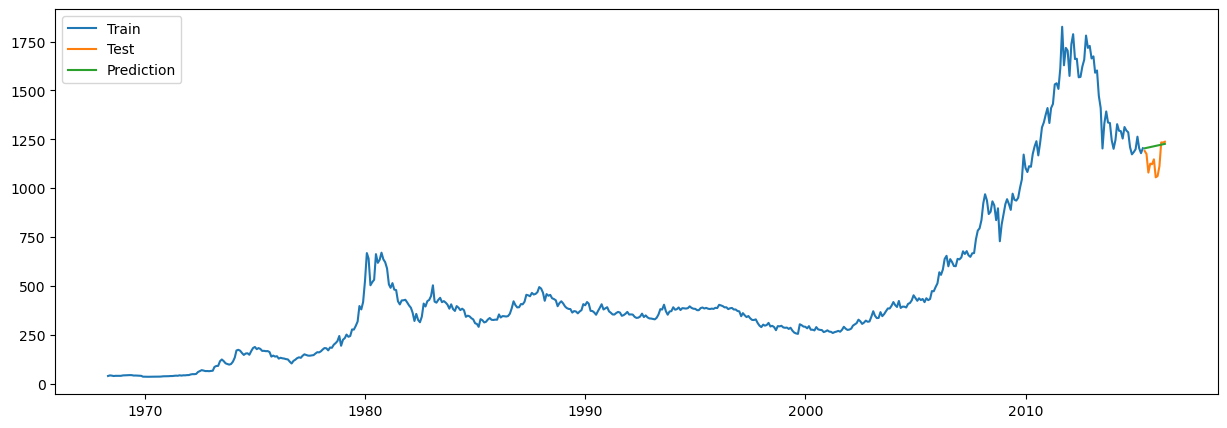

In [8]:
# Without seasonal component
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True) 
arima_with_plot(model)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5615.321, Time=3.04 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5622.164, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5619.560, Time=0.49 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5618.957, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5622.101, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=5613.419, Time=2.70 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=5611.792, Time=5.95 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=5617.378, Time=6.65 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=3.48 sec
 ARIMA(2,1,1)(0,0,2)[12] intercept   : AIC=5622.630, Time=3.63 sec
 ARIMA(3,1,2)(0,0,2)[12] intercept   : AIC=5626.629, Time=4.13 sec
 ARIMA(2,1,3)(0,0,2)[12] intercept   : AIC=5626.630, Time=5.22 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=5621.194, Time=2.39 sec
 ARIMA(1,1,3)(0,0,2)[12] inte

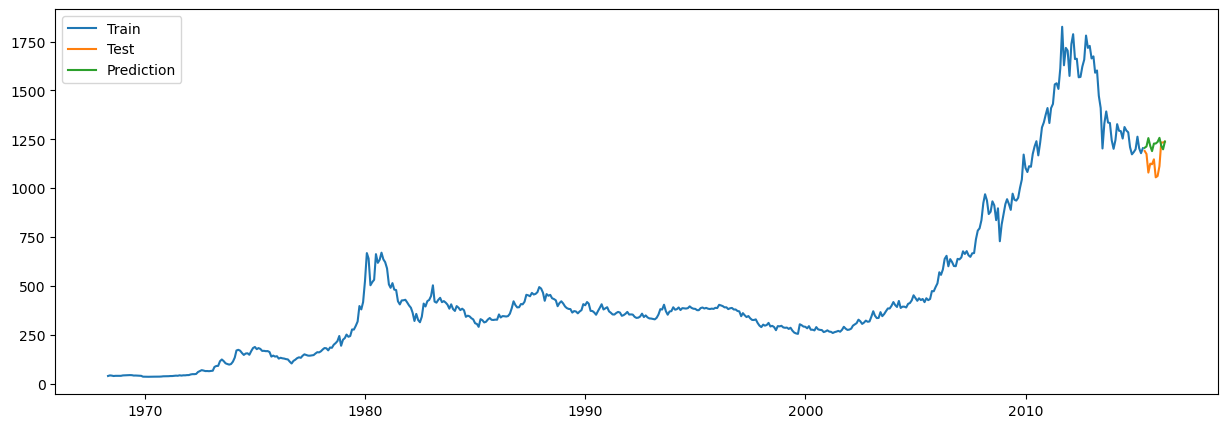

In [9]:
# With seasonal component
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=True, m=12) 
arima_with_plot(model)

In [10]:
# Using Shorter time series for prediction
y = back_df['Value']

y_train = y[337:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((228,), (12,))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2410.968, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2407.363, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2406.885, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2410.202, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2408.814, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2408.781, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2410.466, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2406.689, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2408.663, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2408.648, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2407.036, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2410.350, Time=0.15 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.205 seconds
RMSE:  82.65119170944108


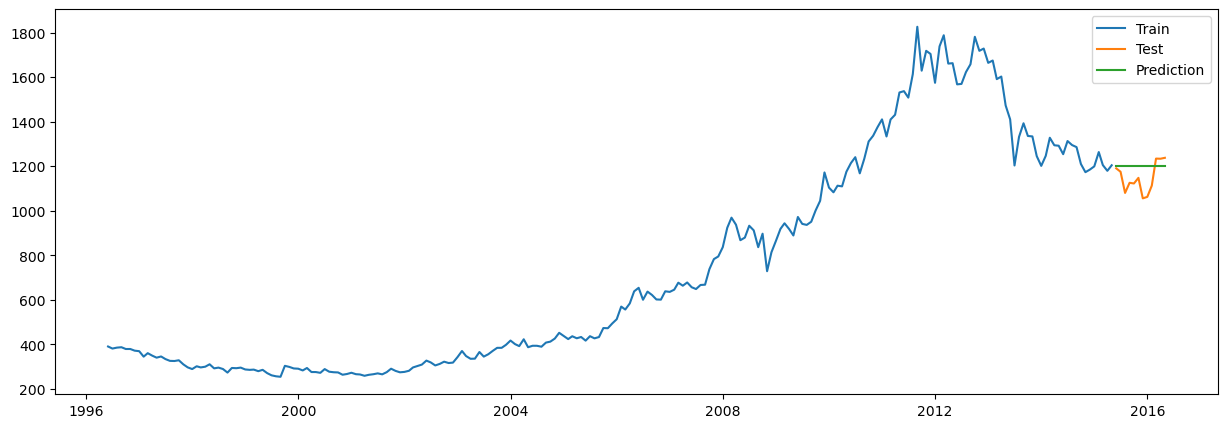

In [11]:
# Without seasonal component
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True) 
arima_with_plot(model)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.11 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2410.968, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2409.363, Time=0.32 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2408.880, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2410.202, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2406.885, Time=0.11 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2408.880, Time=0.46 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2410.101, Time=1.13 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2408.814, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2408.781, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2407.363, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2410.466, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=2406.689, Time=0.06 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=2408.655, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12]

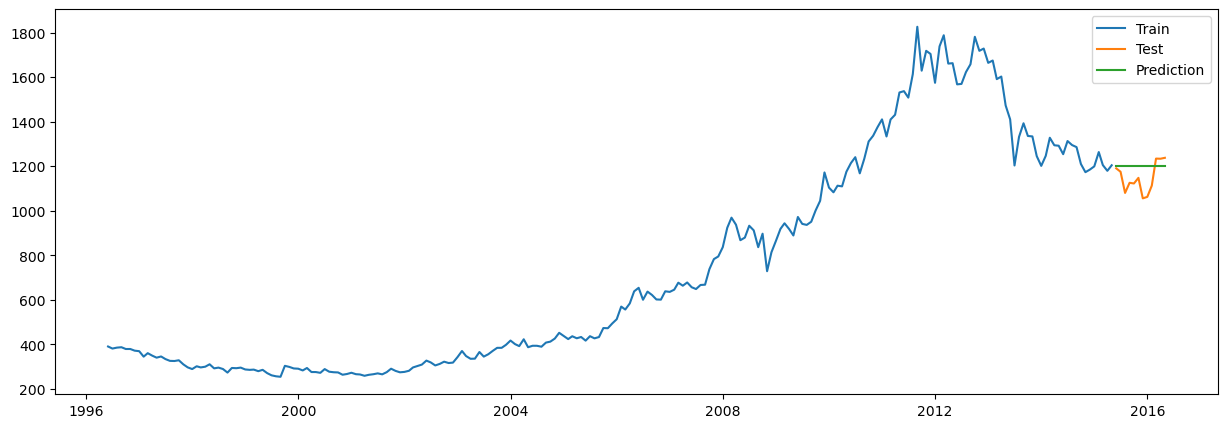

In [12]:
# With seasonal component
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=True, m=12) 
arima_with_plot(model)

With Box Cox Transformation and Auto ARIMA

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=4845.871, Time=2.87 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4849.504, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4848.130, Time=0.48 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4847.650, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4849.719, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=3.00 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=4843.871, Time=2.66 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=4841.871, Time=0.94 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=4848.474, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=4848.456, Time=0.40 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=4852.455, Time=0.51 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=4843.537, Time=1.53 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=4847.270, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[12] intercept   : AIC=4850.527, Time=0.29 sec
 ARIMA(3,1,1)(0,0,0)[12]

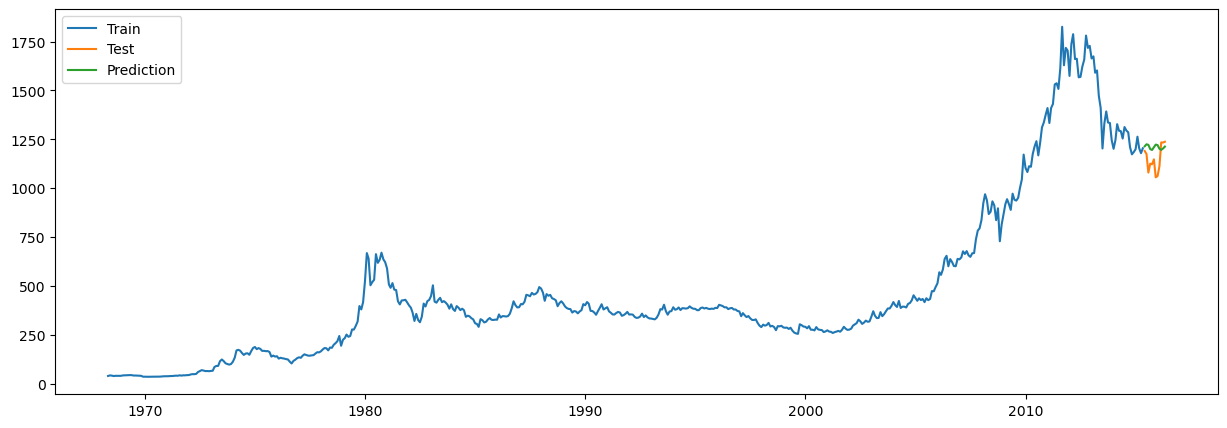

In [28]:
from scipy.special import boxcox, inv_boxcox


lamb = 0.9
y=back_df['Value']
 
# Train and test split
y_trian = y[:-12]
y_test = y[-12:]

y_trans_trn = boxcox(y_trian, lamb)




# With seasonal component
model = auto_arima(y_trans_trn, trace=True, error_action='ignore', suppress_warnings=True, seasonal=True, m=12) 
y_trans_pred = model.predict(len(y_test))

# inverse box cox transformation
y_pred = inv_boxcox(y_trans_pred, lamb)

# RMSE
error = root_mean_squared_error(y_test, y_pred)
print("RMSE: ", error)

# Set index
y_pred.index = y_test.index


# Plot
plt.figure(figsize=(15, 5))
plt.plot(y_trian, label='Train')
plt.plot(y_test, label='Test')
plt.plot(y_pred, label='Prediction')
plt.legend()
plt.show()